In [1]:
import numpy as np
import re
import random
import matplotlib.pyplot as plt

In [2]:
def loadData(filePath, ratio):
    trainingData = [ ]
    testData = [ ]
    with open(filePath) as f:
        for line in f:
            line = line.rstrip('\n')
            line = re.split(r"  [0-9]:| [0-9]:", line)
            line = [float(i) for i in line]
            if random.random() < ratio:
                trainingData.append(line)
            else:
                testData.append(line)
    return trainingData, testData

def splitData(dataSet):
    features = [ ]
    label = [ ]
    n = len(dataSet)
    for i in range(n):
        features.append(dataSet[i][1: ])
        label.append(dataSet[i][0])
    return np.array(features), np.array(label).reshape(n, 1)


def standardizeData(train, test):
    d = train.shape[1]
    mu = np.mean(train, axis = 0).reshape(1, d)
    sigma = np.std(train, axis = 0).reshape(1, d)
    train = (train - mu) / sigma
    test = (test - mu) / sigma
    return train, test
    
def objective(w, X, y, lam):
    yX = np.multiply(y, X)
    yXw = np.dot(yX, w)
    vec = np.log(1 + np.exp(-yXw))
    loss = np.mean(vec)
    penalty = lam / 2 * np.sum(w * w)
    return loss + penalty

def gradient(w, X , y , lam):
    d = X.shape[1]
    yX = np.multiply(y, X) 
    yXw = np.dot (yX, w) 
    vec1 = np.exp (yXw) 
    vec2 = np.divide(yX, 1 + vec1)
    vec3 = -np.mean(vec2, axis = 0).reshape(d ,1) 
    g = vec3 + lam * w
    return g

def gradientSlow(w, X, y, lam):
    n, d = X.shape
    res = np.zeros((1, d))
    for i in range(len(y)):
        res -= (y[i] * X[i:i+1, :]) / (1 + np.exp(y[i] * np.dot(X[i:i+1, :], w)))
    return res.reshape((d, 1)) / n + lam * w

# def gradientMy_new(w, X, y, lam):
#     n, d = X.shape
#     res = np.zeros(d)
#     for i in range(len(y)):
#         res -= (y[i] * X[i]) / (1 + np.exp(y[i] * (X[i] @ w)))
#     return (res / n + lam * w).reshape((d, 1))

def gradientDescent(X, y, lam, alpha, maxIter = 100, w = None):
    n, d = X.shape
    objVal = np.zeros((maxIter, ))
    if w is None: 
        w = np.zeros((d, 1))
    
    for k in range(maxIter):
        objVal[k] = objective(w, X, y, lam)
        # if k % 10 == 0:
        #     print(f"Objective value at epoch {k} is {objVal[k]:.4f}")
        w -= alpha * gradient(w, X, y, lam)
    
    return w, objVal

def SGD_Obj_Grad(w, xi, yi, lam):
    yx = yi * xi
    yxw = float(np.dot(yx, w))
    loss = np.log(1 + np.exp(-yxw))
    obj = loss + lam / 2 * np.sum(w * w)
    grad = -yx.T / (1 + np.exp(yxw)) + lam * w
    return obj, grad    

def Stochastic_GD(X, y, lam, alpha, maxEpoch = 100, w = None):
    n, d = X.shape
    objVal = np.zeros((maxEpoch, ))
    if w is None:
        w = np.zeros((d, 1))
    for k in range(maxEpoch):
        samp = np.random.permutation(n)
        X_rand = X[samp, :]
        y_rand = y[samp, :]
        objValEpoch = 0
        for i in range(n):
            xi = X_rand[i:i+1, :]
            yi = float(y_rand[i, :])
            obj, grad = SGD_Obj_Grad(w, xi, yi, lam)
            objValEpoch += obj
            w -= alpha * grad
        alpha *= 0.9
        objVal[k] = objValEpoch / n
        # if k % 10 == 0:
        #     print(f"Objective value at epoch {k} is {objVal[k]:.4f}")
    return w, objVal

In [3]:
trainData, testData = loadData("..\\data\\diabetes.txt", 0.8)
x_train, y_train = splitData(trainData)
x_test, y_test = splitData(testData)
x_train, x_test = standardizeData(x_train, x_test)

In [4]:
lam = 1e-6
w_gd, objVal_gd = gradientDescent(x_train, y_train, lam, alpha = 1.0)
w_sgd, objVal_sgd = Stochastic_GD(x_train, y_train, lam, alpha = 0.1)

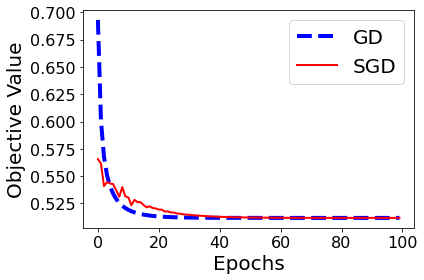

In [5]:
epochs_gd = range(len(objVal_gd))
epochs_sgd = range(len(objVal_sgd))
line0, = plt.plot(epochs_gd, objVal_gd, "--b", linewidth = 4)
line1, = plt.plot(epochs_sgd, objVal_sgd, "-r", linewidth = 2)
plt.xlabel("Epochs", fontsize = 20)
plt.ylabel("Objective Value", fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend([line0, line1], ["GD", "SGD"], fontsize = 20)
plt.tight_layout()
plt.show()